<a href="https://colab.research.google.com/github/thuc-github/MIS710-T12023/blob/main/Week%204/MIS710_Lab_4_Logistic_Reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **MIS710 Lab 4 - Introduction to Logistic Regression**

**Author: Associate Professor Lemai Nguyen**

Objective:
**Breast Cancer Diagnosis**
Predict the diagnosis (healthy or cancerous) based on a biopsy dataset.

**Context**: The dataset was adapted from a biospy dataset. The dataset contains five (5) biological variables and the target variable. 

**Data**: 
V1, V2, V7-V9: biological variables

Diagnosis: healthy or cancerous

**Source**: adapted from a dataset provided by Dr Mark Griffin, Industry Fellow, University of Queensland; also available at: https://www.kaggle.com/datasets/ukveteran/biopsy-data-on-breast-cancer-patients 

**Loading Libraries and Functions**

Read about Logistic Regression at:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

Train Test Split:
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train_test_split#sklearn.model_selection.train_test_split

Classification metrics:
https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics

In [1]:
!pip install pydotplus #interface for graph visualisation
!pip install graphviz #for graph visualisation

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# load libraries
import pandas as pd #for data manipulation and analysis
import numpy as np
 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for model evaluation



## **Loading Data**


1.   Load the dataset
2.   Explore the data



In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
url="https://raw.githubusercontent.com/VanLan0/MIS710/main/biopsy_ln.csv"

In [5]:
# load dataset
records = pd.read_csv(url)

#explore the dataset
print(records)

          ID  V1  V2  V7  V8  V9 diagnosis
0    1177399   8   3   1   6   2   healthy
1    1246562  10   2   1   1   2   healthy
2    1108370   9   5   2   1   5   healthy
3    1165926   9   6   2   9  10   healthy
4    1167439   2   3   2   5   1   healthy
..       ...  ..  ..  ..  ..  ..       ...
694  1124651   1   3   7   2   1   healthy
695  1137156   2   2   7   1   1   healthy
696  1147044   3   1   7   1   1   healthy
697  1213375   8   4   7   8   2   healthy
698   721482   4   4   7   3   1   healthy

[699 rows x 7 columns]


In [6]:
#What does the following code do?
print(records[50:70])

         ID  V1  V2  V7  V8  V9  diagnosis
50  1115282   5   3   4  10   1  cancerous
51  1116998  10   4   4   3  10  cancerous
52  1118039   5   3   4   9   1  cancerous
53  1125035   9   4   4   8   1  cancerous
54  1147748   5  10   4  10  10  cancerous
55  1148278   3   3   4   4   1  cancerous
56  1170419  10  10   4   1   1  cancerous
57  1183983   9   5   4   3   3  cancerous
58  1185609   3   4   4   1   1  cancerous
59  1211202   7   5   4  10   3  cancerous
60  1232225  10   4   4   1   1  cancerous
61  1241559  10   8   4   8  10  cancerous
62  1241679   9   8   4  10   4  cancerous
63  1198641  10  10   4   3   2  cancerous
64   529329  10  10   4  10  10  cancerous
65   555977   5   6   4  10   4  cancerous
66   706426   5   5   4   3   1  cancerous
67   733823   5   4   4   1   1  cancerous
68   785208   5   4   4   3   1  cancerous
69   806423   8   5   4   3   1  cancerous


In [7]:
records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         699 non-null    int64 
 1   V1         699 non-null    int64 
 2   V2         699 non-null    int64 
 3   V7         699 non-null    int64 
 4   V8         699 non-null    int64 
 5   V9         699 non-null    int64 
 6   diagnosis  699 non-null    object
dtypes: int64(6), object(1)
memory usage: 38.4+ KB


In [8]:
#Write your own code to inspect missing data
records.isnull().sum()

ID           0
V1           0
V2           0
V7           0
V8           0
V9           0
diagnosis    0
dtype: int64

In [9]:
#What does the code below do?
print('Sample size:', records.shape[0])
print('Number of columns:', records.shape[1]) 

records.describe()

Sample size: 699
Number of columns: 7


,ID,V1,V2,V7,V8,V9
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.437768,2.866953,1.589413
std,6.170957e+05,2.815741,3.051459,2.438364,3.053634,1.715078
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000
25%,8.706885e+05,2.000000,1.000000,2.000000,1.000000,1.000000
50%,1.171710e+06,4.000000,1.000000,3.000000,1.000000,1.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,1.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000


In [10]:
#What does the code below do? Why would you do it?

records=records.drop(['ID'], axis=1)
records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   V1         699 non-null    int64 
 1   V2         699 non-null    int64 
 2   V7         699 non-null    int64 
 3   V8         699 non-null    int64 
 4   V9         699 non-null    int64 
 5   diagnosis  699 non-null    object
dtypes: int64(5), object(1)
memory usage: 32.9+ KB


##Do NOT do if you have done the previous code!
ALTERNATIVE way to remove ID: 

## **Visually Exploring Data**
1. Explore histograms of continuous variables
2. Generate barcharts of categorical variables
3. Convert data as needed
3. Explore relationships among the variables using heatmaps
4. Explore logistric regression relationships between variables 

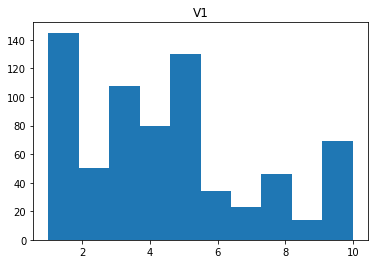

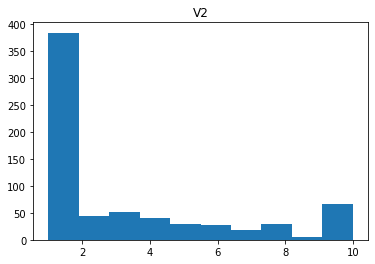

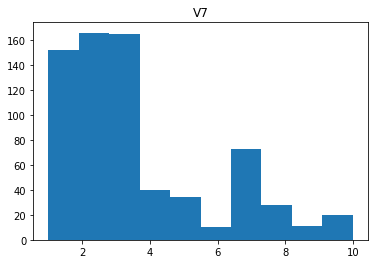

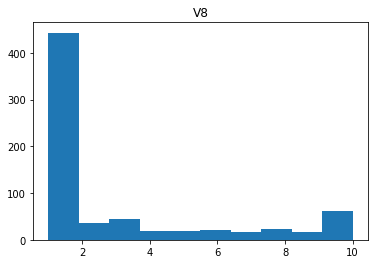

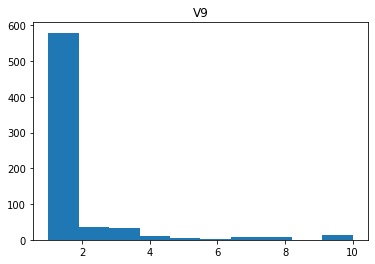

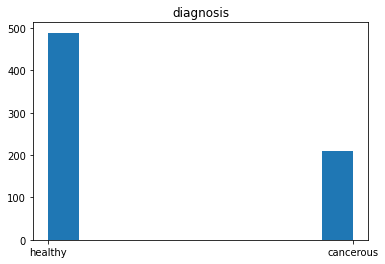

In [11]:
#create histograms
for i in records.iloc[:,:]: 
    plt.hist(records[i])
    plt.title(i)
    plt.show()

<Axes: xlabel='diagnosis', ylabel='count'>

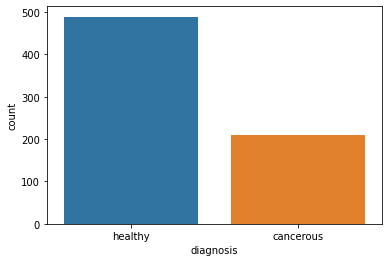

In [12]:
#create barchats
sns.countplot(data=records, x='diagnosis')

In [13]:
#Interpreate the outcome of the following code
records['diagnosis'].describe()

count         699
unique          2
top       healthy
freq          489
Name: diagnosis, dtype: object

**Examine other variables**
Run the code and write down your observations

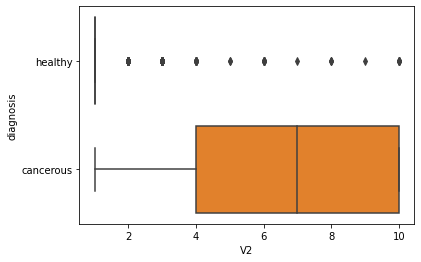

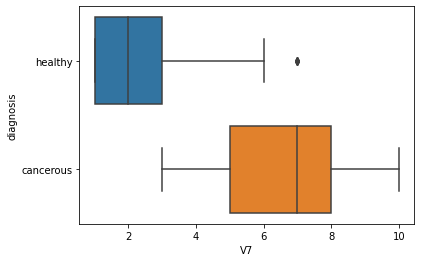

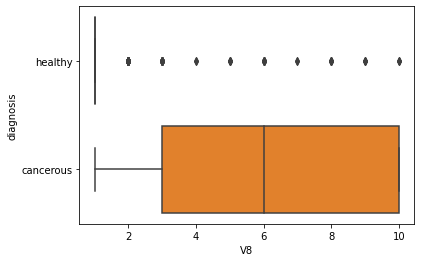

In [14]:
for i in records.columns[1:4]:
    sns.boxplot(data=records, x=i, y='diagnosis')
    plt.show()

In [15]:
#write your own heatmap using cmap='Blue' and annot=True. Hint: using data=records.corr()


What can you observe in the heatmap?

## **Define your own function and call it**

In [16]:
#convert categorical data to numerical 
def coding_diagnosis(x):
        if x=='cancerous': return 1
        if x=='healthy': return 0
       
records['Diagnosis'] = records['diagnosis'].apply(coding_diagnosis)

print(records.sample(10))

     V1  V2  V7  V8  V9  diagnosis  Diagnosis
508   4   1   2   1   1    healthy          0
499   4   1   2   1   1    healthy          0
693   6   6   7   8   1    healthy          0
573   1   1   3   1   1    healthy          0
123   6  10   7   8  10  cancerous          1
161   7   6   7   1   1  cancerous          1
317   4   1   1   1   1    healthy          0
73    8  10   4   8   7  cancerous          1
577   8   3   3   2   1    healthy          0
187   5   4   8  10   1  cancerous          1


In [17]:
#Another way to convert categorical variables to numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
records['Diagnosis'] = encoder.fit_transform(records['diagnosis'])
print(records.sample(10))

     V1  V2  V7  V8  V9  diagnosis  Diagnosis
651   3   3   3   5   1    healthy          1
50    5   3   4  10   1  cancerous          0
365   4   1   1   1   1    healthy          1
297   1   1   1   1   1    healthy          1
340   3   1   1   1   1    healthy          1
653   3   2   3   1   1    healthy          1
564   4   1   3   1   1    healthy          1
620   3   1   3   1   1    healthy          1
444   4   1   2   2   1    healthy          1
398   3   1   2   1   1    healthy          1


Compare the above two techniques

**Plotting biomarkers and diagnosis uaing a logistric relationship**

<Axes: xlabel='V7', ylabel='Diagnosis'>

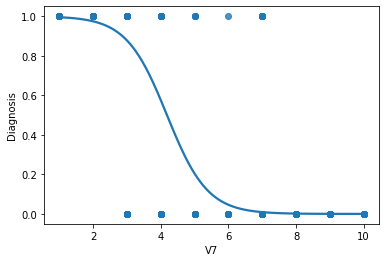

In [18]:
sns.regplot(x=records['V7'], y=records['Diagnosis'], logistic=True, ci=None)

**Feature Selection**

Select predictors (attributes) for Classification
Set role (Target)

In [19]:
records

,V1,V2,V7,V8,V9,diagnosis,Diagnosis
0,8,3,1,6,2,healthy,1
1,10,2,1,1,2,healthy,1
2,9,5,2,1,5,healthy,1
3,9,6,2,9,10,healthy,1
4,2,3,2,5,1,healthy,1
...,...,...,...,...,...,...,...
694,1,3,7,2,1,healthy,1
695,2,2,7,1,1,healthy,1
696,3,1,7,1,1,healthy,1
697,8,4,7,8,2,healthy,1


In [20]:
#Selecting predictors
features =['V1', 'V2', 'V7', 'V8', 'V9'] #you can select a range of columns features = records.columns[0:5]

#complete the code below
X = records[features]
y = records.Diagnosis


## **Split the Dataset**

Split arrays or matrices into random train and test subsets
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train_test_split#sklearn.model_selection.train_test_split

In [21]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)  # 80% training and 20% testing 

#inspect the split datasets



## **Training a Logistic Regression Model**

1.   Train a model using the training dataset
2.   Make prediction using the model for the test dataset

Read about Logistic Regression Classifier at: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html




In [23]:
# Create Logitic Regression classifer object

#Create an initial Logistic Regression model
logreg = LogisticRegression(max_iter=100)

# Complete the code to train Logistic Regression Classifer with the traning dataset 
logreg = logreg.fit(X_train, y_train)

#Complete the code to make predictions for the test dataset
y_pred = logreg.predict(X_test)


**Inspect Predictions**

In [24]:
#join unseen y_test with predicted value into a data frame
inspection=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})

#join X_test with the new dataframe
inspection=pd.concat([X_test,inspection], axis=1)

inspection.head(20)

,V1,V2,V7,V8,V9,Actual,Predicted
584,1,1,3,1,1,1,1
417,4,1,2,1,1,1,1
606,1,1,3,1,1,1,1
349,5,1,1,1,1,1,1
134,1,5,7,10,1,0,0
502,3,1,2,1,1,1,1
117,8,4,7,3,1,0,0
528,3,1,2,1,1,1,1
685,3,2,4,2,1,1,1
411,1,1,2,1,1,1,1


## **Model Evaluation**



1.   Calculate Accuracy, Precision, Recall, F1


Classification metrics: https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics







In [30]:
#import evaluation functions
from sklearn.metrics import precision_recall_curve, precision_recall_curve, classification_report

#Model Evaluation, calculate metrics: Accuracy, Precision, Recall, F1,
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))
print("Precision: ", metrics.precision_score(y_test,y_pred))
print("Recall: ", metrics.recall_score(y_test,y_pred))
print("F1: ", metrics.f1_score(y_test,y_pred))



Accuracy:  0.9142857142857143
Precision:  0.9278350515463918
Recall:  0.9473684210526315
F1:  0.9374999999999999


Interpret the above

In [38]:
#print confusion matrix and evaluation report
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

[[38  7]
 [ 5 90]]
              precision    recall  f1-score   support

           0       0.88      0.84      0.86        45
           1       0.93      0.95      0.94        95

    accuracy                           0.91       140
   macro avg       0.91      0.90      0.90       140
weighted avg       0.91      0.91      0.91       140



**Plot ROC (Receiver operating characteristic) curve and confusion matrix**

ROC curve
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html?highlight=plot_roc_curve#sklearn.metrics.plot_roc_curve

Confusion matrix
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html?highlight=plot%20confusion%20matrix#sklearn.metrics.plot_confusion_matrix

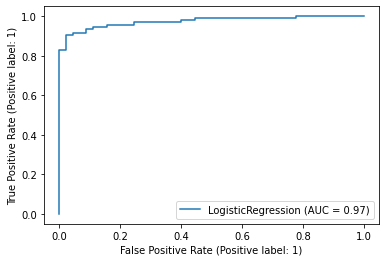

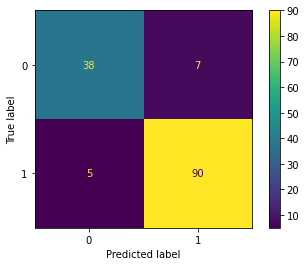

In [41]:
#import classes to display RocCurve and Confusion Matrix, read example from the website and try on your own
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay

#complete the code to display RocCurve and Confusion Matrix
RocCurveDisplay.from_estimator(logreg, X_test, y_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

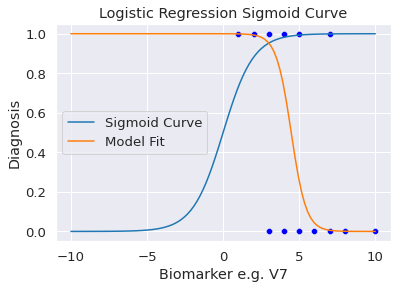

In [43]:
# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Generate a sequence of points along the x axis
x_vals = np.linspace(-10, 10, 100)

# Calculate the corresponding y values using the model coefficients
coef = logreg.coef_.flatten()
intercept = logreg.intercept_
y_vals = sigmoid(np.dot(X_test, coef) + intercept)

# Plot the sigmoid curve using seaborn
sns.lineplot(x=x_vals, y=sigmoid(x_vals), label='Sigmoid Curve')
sns.lineplot(x=x_vals, y=sigmoid(np.dot(np.column_stack(([x_vals]*5)), coef) + intercept), label='Model Fit')
sns.set_style('darkgrid')
sns.set_context('notebook', font_scale=1.2)
sns.scatterplot(x=X_test['V7'], y=y_test, color='blue')
plt.xlabel('Biomarker e.g. V7')
plt.ylabel('Diagnosis')
plt.title('Logistic Regression Sigmoid Curve')
plt.legend()
plt.show()

In [44]:
print(coef[0])

-0.3398365008597904


In [45]:
print('Diagnosis= ', '%.3f' % intercept, '+', '%.3f' %coef[0], '*V1', '+', '%.3f' %coef[1], '*V2', '+', '%.3f' %coef[2], '*V7', '+', '%.3f' %coef[3], '*V8', '+', '%.3f' %coef[4], '*V9')

Diagnosis=  9.123 + -0.340 *V1 + -0.116 *V2 + -1.316 *V7 + -0.221 *V8 + -0.045 *V9


## **Congratulaitons!**

Now do it yourself for other datasets:

1.  Habermans survival dataset: https://www.kaggle.com/datasets/gilsousa/ or an adapted dataset: https://raw.githubusercontent.com/VanLan0/MIS710/main/haberman_ln.csv or 
2.  Tinanic dataset from Lab 1
3.  and/or another dataset of your choice



# Try it yourself! 

**Do it yourself:** Repeat the above steps with the telco churn dataset to consilidate your learning


## Loading libraries

In [46]:
# Load necessary libraries here
import pandas as pd

## Import dataset

In [47]:
# Load data using pandas.read_csv(filepath_or_url, sep=',')
url = 'https://raw.githubusercontent.com/thuc-github/MIS710-T12023/main/Week%204/WA_Fn-UseC_-Telco-Customer-Churn.csv'

df = pd.read_csv(url)


## EDA

* How many rows and columns in the dataset? 
* Return the first n rows.
* What are the columns and their datatypes?
* Is there any missing values? 
* Any strong correlation from the dataset?  
* How to deal with categorical features? 



In [ ]:
# Checking the data types of all the columns

# Converting Total Charges to a numerical data type.

# Check missing values

# Handle missing values 

# Remove customer IDs from the data set

# Convert the predictor variable to binary numeric variables

# Convert categorical variables into dummy variables

# Get Correlation of "Churn" with other variables


### Data Exploration
* Demographics (age, gender, partner and dependent status)
* Customer account information (Tenures, contracts)
* Distribution of services 
* Relation between variables 
* Distribution of predictor variable (`Churn`)

## Data preparation 


1.   Prepare X, y
2.   Prepare X_train, X_test, y_train, y_test (hint: using `train_test_split')



## Model implementation

1. Try with the original data. What's the performance?
2. Let's add data normalisation. Has the performance been improved?

## Performance evaluation
* Classification report
* Confusion matrix 
* Importance weight
* ROC and AUC